Name: __________________ Class: __________________ Date: __________________

<center>
    <img width="100%" src="https://raw.githubusercontent.com/astroDimitrios/AstronomyClass/master/DesignAssets/Ai/Banner3plainCut.png" alt='AP Logo'>
</center>

# Solar Radiation

### AIM - Visualise the black-body radiation from different temperature stars and calculate the effective temperature of planets.
Difficulty: Easy

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) Do hotter objects emit more light of longer or shorter wavelengths?  
2) What colour light does our Sun emit the most of?     
3) What colour are the hottest stars?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [Black-body Radiation](#BBR)
* [Stellar Luminosity](#SBL)
* [Warming the Planets](#WP)
* [Challenges](#Challenges)
* [References](#References)

## Let's go: The Multi-Wavelength Sun<a class="anchor" id="Start"></a>

Stars emit all wavelengths of the electromagnetic spectrum but with different intensity. Stars emit the most light at a certain peak wavelength, $\lambda_{peak}$. We can use Wien's Law to calculate the peak wavlength for our Sun.

$$\lambda_{peak} = \frac{b}{T}$$

- $b$ is Wien's displacement constant or $2.897771955\times10^{-3}\ mK$
- $T$ is the effective surface temperature. This is the temperature of a blackbody that would emit the same amount of radiation as the object or star, for the Sun this is $5772\ K$

<div class="alert alert-block alert-success">
Let's calculate the $\lambda_{peak}$ for our Sun by completing the code below:</div>

In [1]:
# run me
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, Layout
%matplotlib widget

In [2]:
T = 5772                 # K
b = 2.897771955*10**(-3) # m K

# input Wien's Law here
# Your code here:
peak_wavelength = b / T

print(f"The peak wavelength is : {peak_wavelength*10**9:.0f} nm")

The peak wavelength is : 502 nm


<br> What colour is the wavelength you calculated?     
Why do you think the Sun is not this colour in the Sky?
<div class="alert alert-block alert-success">
Use the interactive slider below to work out the peak wavelengths for the following bright Stars:

1) Betelgeuse $3500\ K$     
2) Rigel $11000\ K$
</div>

In [3]:
@interact(T=(1,10000))
def weins(T):
    b = 2.897771955*10**(-3) # m K
    lp = b/T
    print(f"The peak wavelength for temp {T:.0f} K is : {lp*10**9:.0f} nm")

interactive(children=(IntSlider(value=5000, description='T', max=10000, min=1), Output()), _dom_classes=('widg…

**Enter your answers:**    
1) Betelguese -     
2) Rigel -      

<br>

## Black-body Radiation <a class="anchor" id="BBR"></a>

We can approximate the Sun as a black-body. A black-body is an object that absorbs and emits radiation perfectly at all frequencies of the electromagnetic spectrum.
The Sun doesn't emit the same amount of radiation for each wavelength of light, we know this having just calculated the peak wavelength emitted. To work out the intensity of radiation emitted at other wavelengths we will need Planck's Law:

$$B(\lambda, T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_B T}}-1}$$

- $B$ is the spectral intensity for a given wavelength, $\lambda$, and surface temperature, $T$, of a star 
- $h$ is Planck's constant
- $c$ is the speed of light in a vacuum
- $k_B$ is the Boltzmann constant
- $T$ is the effective surface temperature

<div class="alert alert-block alert-success">Again assume that the surface temperature of the Sun is $5772\ K$. Complete the code below to create a plot of spectral intensity over the wavelength range $10 - 3000\ nm$.</div>

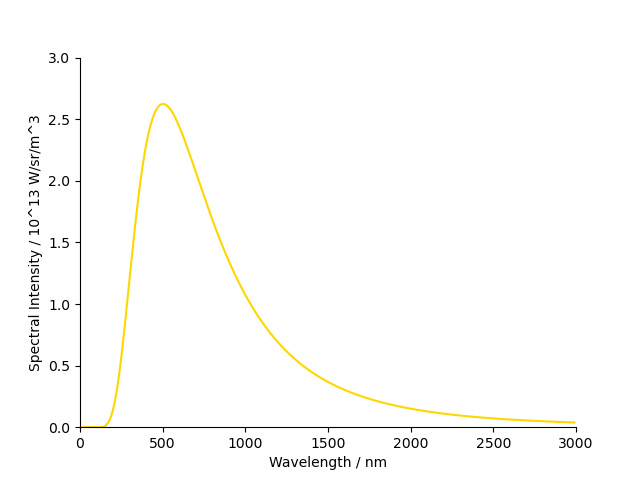

In [4]:
T = 5772 # K
kB = 1.380649*10**(-23) # J/K
c = 299792458 # m/s
h = 6.62607015*10**(-34) # Js

# create an array of wavelengths in nm
# Your code here:
l = np.arange(10,3000,10)

# l is in nanometres, convert it to metres
# Your code here:
l = l*10**(-9)

# calculate B using Planck's Law
# Your code here:
B = 2*h*c**2/l**5 * 1/(np.exp(h*c/(l*kB*T))-1)

fig = plt.figure(2)
ax = plt.subplot(xlim=(0,3000),ylim=(0,3))
ax.plot(l*10**9, B/10**13, c="gold")
ax.set_xlabel("Wavelength / nm")
ax.set_ylabel("Spectral Intensity / 10^13 W/sr/m^3")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

Black-body curves rise sharply at short wavelengths and have long tails dropping off into longer wavelengths. To see a load of radiation curves for different temperature stars load the **blackbodyCurves** image by running the cell below:

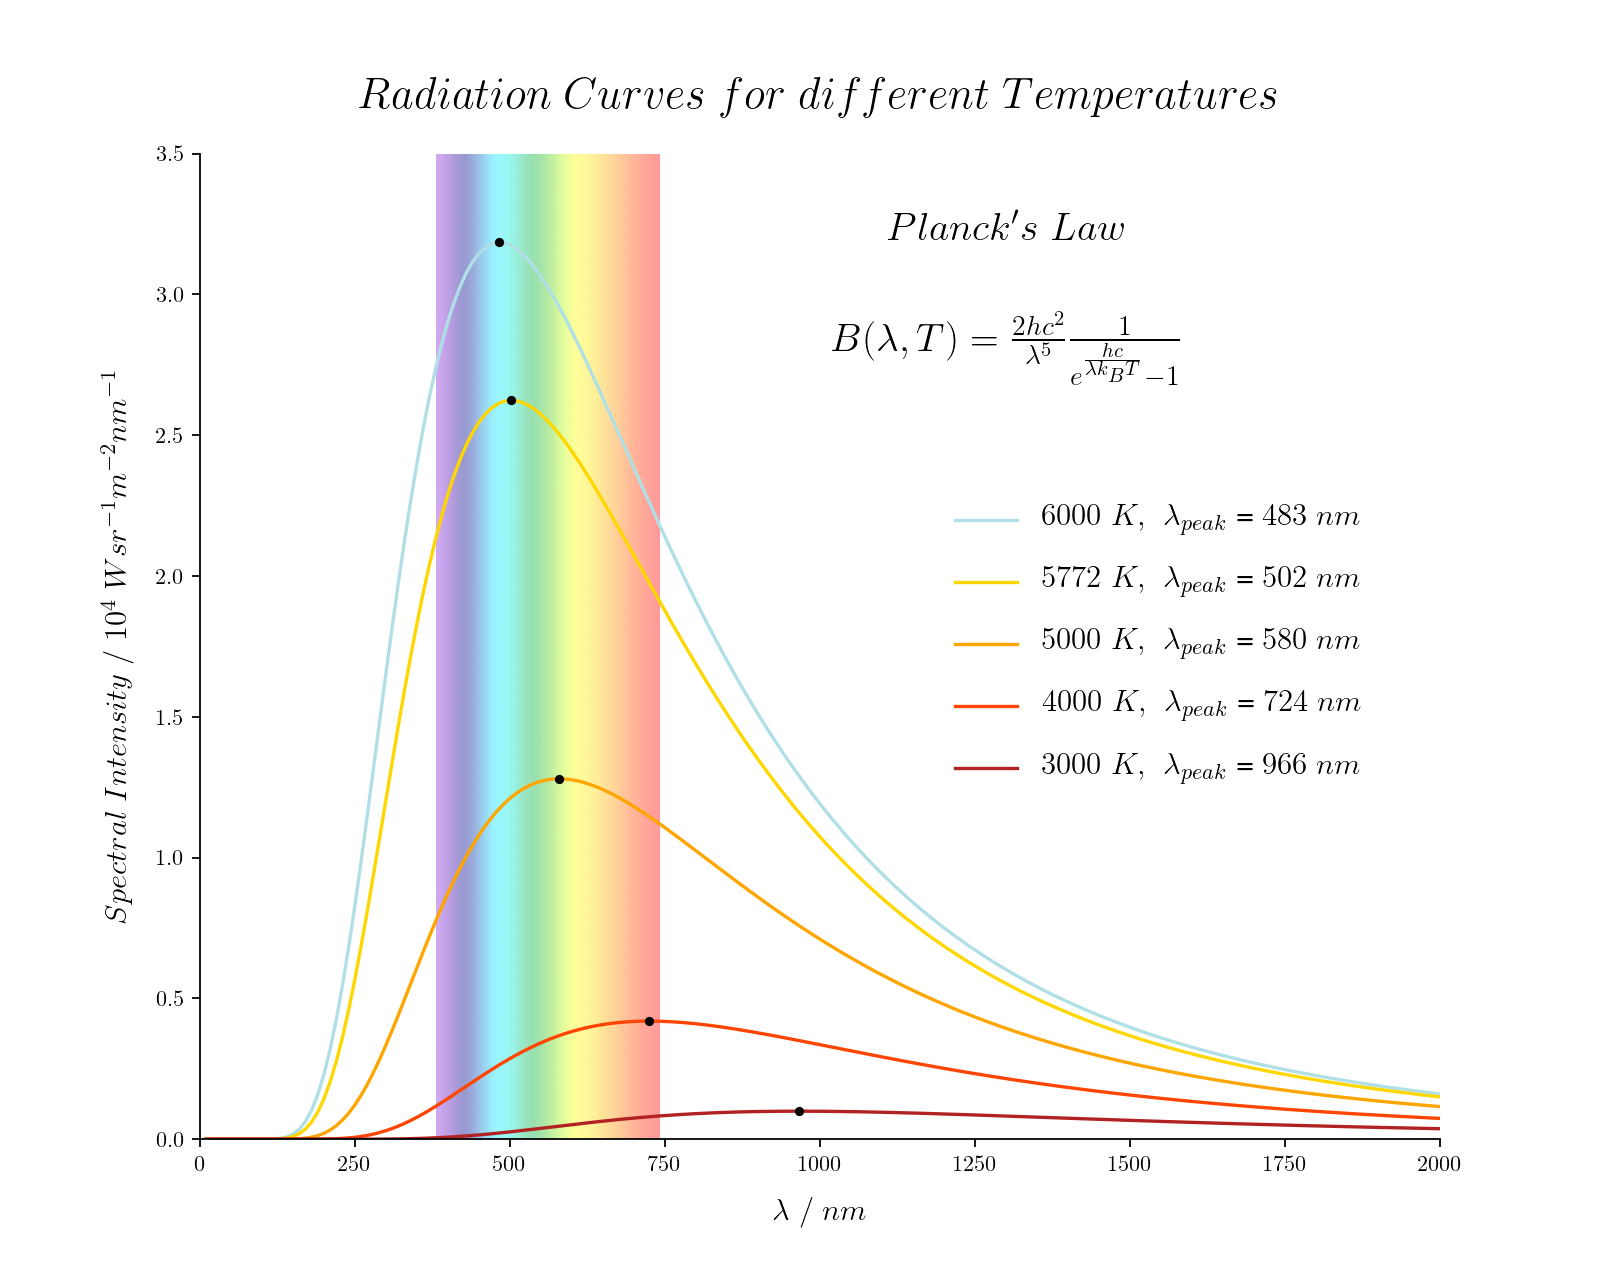

In [5]:
# run me
Image("blackbodyCurves.png")

The yellow line with a peak of $502\ nm$ is for the Sun. This peak is a wavelength of green/blue light not yellow like our Sun is.  
Our Sun looks yellow because it radiates other wavelengths as well. The longer tail on the right of the graph to the redder wavelengths means even though the peak wavelength is green the Sun overall looks yellow.
<div class="alert alert-block alert-success">
    
Use the interactive below to create the blackbody curves for Betelguese and Rigel (temperatures above). How do their blackbody curves compare to the Suns which is the black line?
    
</div>

interactive(children=(FloatSlider(value=2500.0, continuous_update=False, description='T', max=10000.0, min=250…

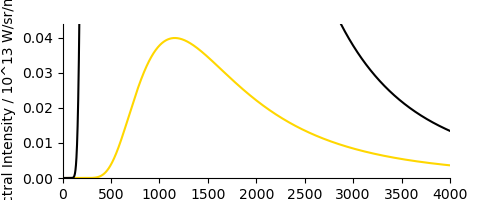

In [6]:
#run me

def blackBody(T):
    kB = 1.380649*10**(-23) # J/K
    c = 299792458 # m/s
    h = 6.62607015*10**(-34) # Js
    
    l = np.arange(10,4000,1)*10**(-9)

    B = 2*h*c**2/l**5 * 1/(np.exp(h*c/(l*kB*T))-1)
    B_SUN = 2*h*c**2/l**5 * 1/(np.exp(h*c/(l*kB*5772))-1)

    fig = plt.figure(num=3,figsize=(5,2))
    ax = plt.subplot(xlim=(0,4000),ylim=(0,max(B)/10**13*1.1))
    ax.plot(l*10**9, B/10**13, c="gold")
    ax.plot(l*10**9, B_SUN/10**13, c="k")
    ax.set_xlabel("Wavelength / nm")
    ax.set_ylabel("Spectral Intensity / 10^13 W/sr/m^3")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

interactive_plot = interactive(blackBody, T=FloatSlider(min=2500, max=10000, 
                                                        step=1, continuous_update=False), 
                              layout=Layout(height='100%'))
interactive_plot

<br>

## Stellar Luminosity <a class="anchor" id="SBL"></a>

You may have noticed by now that hotter stars emit more radiation and have a higher peak spectral intensity. We can work out the luminosity (power) of a star using its temperature and the Stefan-Boltzmann Law. This law relates a star's temperature and radius to its luminosity, the amount of energy emitted per second:

$$L = 4\pi R^2\sigma T^{4}$$

- $R$ is the radius of the star
- $\sigma$ is the Stefan-Boltzman constant
- $T$ is the effective surface temperature

<div class="alert alert-block alert-success">
Let's calculate the luminosity of the Sun using this law:</div>

In [7]:
SIGMA = 5.670374419*10**(-8) # W m^-2 K^-4

# find and enter the mean radius of the Sun in metres
# Your code here:
R_SUN = 6.957*10**8          # m

# use Stefan-Boltzman's law to calculate the luminosity of the Sun
# Your code here:
L_sun = 4*np.pi*R_SUN**2*SIGMA*T**4

print(f"The Luminosity of the Sun is : {L_sun:.2e} W")

The Luminosity of the Sun is : 3.83e+26 W


<br>We get very close to the accepted value of $3.828\times10^{26}\ W$ (https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html).     

Of course the Sun is not a perfect black-body which we have assumed throughout this section.
If were to plot observational data for the Sun on our graph from earlier it would follow the gold curve but with dips and spikes.
These are atomic absorption and emissions lines which we will look at in a future Notebook.
<div class="alert alert-block alert-success">
    
Use the next interactive to answer these questions:

1) Which has a greater effect on Luminosity, surface Temperature or Radius of the star?
2) How many times less/more luminous is Betelguese, radius 887 solar radii, compared to the Sun?
3) How many times less/more luminous is Rigel, radius 79 solar radii, compared to the Sun?

The first slider $R$ changes the radius of the star in units of solar radii.  
The second slider $T$ changes the temperature of the star in K.

</div>

In [8]:
@interact(R=(0.5,900,0.1), T=(2500,11000,1))
def lumin(R, T):
    sigma = 5.670374419*10**(-8) # W m^-2 K^-4
    Tsun = 5772 # K
    Rsun = 6.957*10**8 # m
    R = Rsun*R
    Lstar = 4*np.pi*R**2*sigma*T**4
    Lsun = 4*np.pi*Rsun**2*sigma*Tsun**4
    ratio = Lstar/Lsun
    print(f"The Luminosity of the star is : {Lsun:.2e} W or {ratio:.2f} times that of the Sun")

interactive(children=(FloatSlider(value=450.20000000000005, description='R', max=900.0, min=0.5), IntSlider(va…

**Enter your answers:**    
1) 
2) Betelguese -     
3) Rigel -      

<br>    

## Warming the Planets <a class="anchor" id="WP"></a>

The Suns radiation warms the planets. If we also approximate the planets as black bodies we can calculate their equilibrium temperature, $T_{p}$.
This is the temperature a planet would be from just solar heating by absorbing all incident solar radiation and emitting it all as well (remember black-bodies emit and absorb radiation perfectly).
The equilibrium temperature is achieved when the absorbed radiation is equal to the emitted radiation of the planet (gaining energy from radiation as fast as it is loosing it).
The power the planet receives is:

$$P_{in} = L_{\odot}(1-a)(\frac{\pi R_{p}^{2}}{4\pi D^2})$$

$$P_{in} = 4\pi R_{\odot}^{2}\sigma T_{\odot}^{4}(1-a)(\frac{\pi R_{p}^{2}}{4\pi D^2})$$

This is the luminosity of the sun, $L_{\odot}$, times the fraction of light that is absorbed by the planet $(1-a)$. The final term is the area of a circle the size of the planet divided by the area of the sphere whos radius is the distance of the planet to the Sun. This term is the amount of sunlight that reaches the planet since the radiation spreads out in all directions after leaving the solar surface according to the inverse square law.

$a$ is the albedo of the planet which is how much incident radiation is reflected back into space.
Objects with icier or whiter surfaces have a higher albedo since ice and white objects reflect more light than darker objects.

The power radiated from the planet is found using the Stefan-Boltzmann Law, $P_{out} = 4\pi R_p^2\sigma T_{p}^{4}$.
Equating $P_{in}$ and $P_{out}$ we get:

$$T_{p} = T_{\odot}(1-a)^{\frac{1}{4}}\sqrt{\frac{R_{\odot}}{2D}}$$

<div class="alert alert-block alert-success">
Complete the code below to calculate the equilibrium temperature for the Earth:</div>

In [9]:
a_EARTH = 0.306     # Earth's average albedo
AU = 149597870700   # 1 Astronomical Unit in metres
K_to_degC = 273.15  # conversion Kelvin to degrees Celcius
D = 1 * AU          # average distance to the Sun in metres

# use the equation above to calculate the effective temperature of the Earth
# Your code here:
TeqEarth = T*(1-a_EARTH)**0.25*np.sqrt(R_SUN/2/D)

degSymb = '\u00b0'
print(f"The Equilibrium Tmperature of the Earth is: {TeqEarth:.0f} K")
print(f"The Equilibrium Tmperature of the Earth is: {TeqEarth-K_to_degC:.0f} {degSymb}C")

The Equilibrium Tmperature of the Earth is: 254 K
The Equilibrium Tmperature of the Earth is: -19 °C


<br>Wow chilly! This temperature doesn't take into account internal planetary heating or the greenhouse effect so it is lower than expected.
<div class="alert alert-block alert-success">
    
Use the interactive below to find the 'Goldilocks Zone' for our Sun. This is the region where water could be liquid on an Earth like planet. Assume an albedo of $0.3$ for the Earth.

Reminder for the sliders:

- $a$ is the albedo of the body  
- $D$ is the distance the body is from its star in AU  
- $T$ is the surface temperature of the star in K  
- $R$ is the radius of the star in solar radii

</div>

In [10]:
@interact(a=(0,1,0.1), D=(0.1,50,0.01), T=(2500,10000,1), R=(0.5,30,0.1))
def eqT(a, D, T, R):
    Rsun = 6.957*10**8 # m
    R = R*Rsun
    AU = 149597870700 # m
    KtodegC = 273.15
    degSymb = '\u00b0'
    D = D * AU
    eqT = T*(1-a)**0.25*np.sqrt(R/2/D)
    print(f"The Equilibrium Temperature of this body is: {eqT:.0f} K or {eqT-KtodegC:.0f} {degSymb}C")

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0), FloatSlider(value=25.05, description='…

**Enter your answers:**    
- Inner Goldilocks Zone Radius: _________ AU
- Outer Goldilocks Zone Radius: _________ AU

<br>
We have made lots of assumptions during this section such as the albedo of the Earth is constant. What happens to the equilibrium temperature if the albedo changes? If the Earth was completely covered in ice the albedo would be roughly 0.84.
<br>
<br>
Feel free to go back to the interactives and play around with the input parameters. Or perhaps tackle one of the challenges below.

# Challenge <a class="anchor" id="Challenges"></a>

 1) Try to recreate/improve my black-body curve image, **blackbodyCurves.png**  
 2) Plot the actual solar spectrum using data from https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00899  
    You will get something like this: https://en.wikipedia.org/wiki/File:EffectiveTemperature_300dpi_e.png  
 3) Calculate the effective temperature of Mars, Venus, and Jupiter like we did for the Earth  
    How do the values compare with the actual average surface temperatures?

# References and Resources <a class="anchor" id="References"></a>

Mihos, C. (2020) Stars and Planets, Url: http://burro.case.edu/Academics/Astr221/SolarSys/equiltemp.html

## Sharing

If you share, use or modify this activity in any way use the citation in this [txt file](https://github.com/astroDimitrios/Astronomy/blob/master/CITATION.txt).    
Please contact me at astrodimitrios@gmail.com with any suggestions, mistakes found, or general questions about teaching astronomy with Python.

© Dimitrios Theodorakis GNU General Public License v3.0 


https://github.com/astroDimitrios/Astronomy  